# Data Analysis - Lab 4
### M. Sébastien MASCHA & M. Sauvage Pierre
### ISEP Paris – November 5th, 2019
<br/>
<br/>

___
# Import of libraries

This document has been done using python on Jupyter Notebook with the librairies:

- maths for sqrt, pi, exp
- Numpy to manipulate arrays
- pandas to import csv
- matplotlib to plot graphics
- seaborn to make your charts prettier (built on top of Matplotlib)
- sklearn : tools for data mining and data analysis
- mlxtend : tools for ploting PCA

In [94]:
# coding: utf-8

import data

from math import sqrt,pi,exp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

import sklearn
# Normalize data
from sklearn.preprocessing import StandardScaler
# Dimension reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
# Useful 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



<br/>
<br/>

___
# Exercice A - Analysing Fiher's Iris with the K-Means algorithm
In this exercice, we study one of the most famous dataset : Fisher's Iris , in which different characteristics of iris flower are studied.
### Question 1 - Open the file

We use the comma separator because we saw in the text editor that the data was separated
by commas.

In [95]:
iris_df = pd.read_csv("data/iris.csv", sep =';')


iris_df.head()



,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


 As we can see from  the command dataframe.head() & dataframe.shape(), our dataset contains attributes on 150 flowers :  their sepals length and width  and the same measure for their petals. Each flower is assign a class

### Question 2 - Remove these labels from the main set and store them in another vector.

In [96]:
iris_class = iris_df['Class']
iris_dfcopy = iris_df.copy
iris_df = iris_df.drop(iris_df.columns[[4]], axis=1)
iris_df.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Question 3 - Use the command PCA(·) from sklearn.decomposition to do a Principal Component Analysis on your data. Then use the following lines to retrieve the dataset projected on the two principal components:

In [181]:


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_df_features)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf_iris_wth_class = pd.concat([principalDf, iris_class ],axis = 1)

### Question 4 Use the K-Means algorithm (library sklearn.cluster ) on your data df_iris_PCA to obtain a partition with 3 clusters and visualize your results



In [182]:
kmeans = KMeans(n_clusters = 3, n_init = 5, max_iter=300,random_state=232).fit(principalDf)
kmeans.score(principalDf)
prediction = kmeans.predict(principalDf)
print(prediction)
print(kmeans.score(principalDf))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
-116.24247259315806


We use the code of lab 3 exercize A :

In [162]:
def associateColorToClass(iris_class):
    switcher = {
                    'setosa': "r",
                    'virginica': "b",
                    'versicolor': "g"
                }

    return switcher.get(iris_class)

principalDf_iris_wth_class['Color'] = principalDf_iris_wth_class.apply(lambda x: associateColorToClass(x['Class']), axis=1)


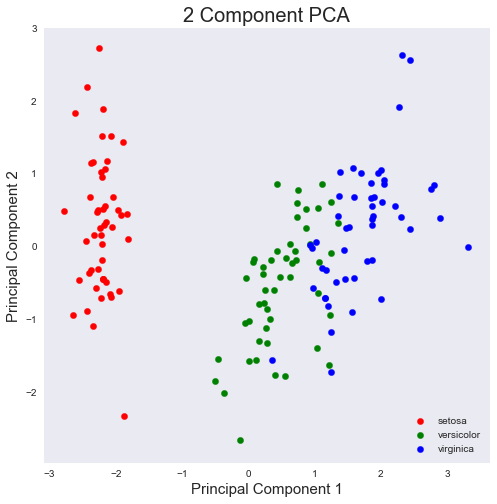

In [163]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = principalDf_iris_wth_class.Class.unique()
colors = principalDf_iris_wth_class.Color.unique()
for target, color in zip(targets,colors):
    indicesToKeep = principalDf_iris_wth_class['Class'] == target
    ax.scatter(principalDf_iris_wth_class.loc[indicesToKeep, 'principal component 1']
               , principalDf_iris_wth_class.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 40)
ax.legend(targets)
ax.grid()

### Question 5- Repeat question 4) several times. What happens ? Comment. 



We can see that each time we repeat the lines of code from the question 4, the values in the array prediction  change :
The K-Mean clustering prediction varies each times assigning a value to a cluster (0,1,2) and assigning this values to each flower the prediction  of belonging to one cluster 
(and the value of kmeans.score(iris_df) also changes by the hundreth). 

### Question 6- Project the labels that you stored in a separate vector in question 2). Compare these results with the partitions from your K-Means experiments. Comment.


In [190]:
prediction_series = pd.Series(prediction)
prediction_str=np.empty((len(prediction))).astype(str)
prediction_str[prediction== 1]='setosa'
prediction_str[prediction== 0]='versicolor'
prediction_str[prediction== 2]='virginica'
prediction_series = pd.Series(prediction_str)
compare = pd.concat([iris_class,prediction_series], axis =1)
compare['equal']=(compare['Class']==compare[0])
compare['equal'].value_counts()

True     123
False     27
Name: equal, dtype: int64

We can see that all the prediction are not valid, as some times virginica class has the corresponding value of 2 and less often the value of 1.
We have 27 prediction that are false out of 123 representing 21,95% of prediction. 
It can be explain by  the fact that two classes : versicolor and virginica are colliding when ploting the PCA visualization. it results that some flowers are consider versicolor instead of virginica and vice versa

### Question 7 - Display the confusion matrix between your results with the theoretical labels.


In [166]:

prediction_str=np.empty((len(prediction))).astype(str)
prediction_str[prediction== 1]='setosa'
prediction_str[prediction== 0]='versicolor'
prediction_str[prediction== 2]='virginica'
#conf_pred = confusion_matrix(np.array(iris_class.values, dtype=int),np.array(prediction, dtype=int))
conf_pred = confusion_matrix(np.array(iris_class.values, dtype=str),np.array(prediction_str))
np.unique(np.array(iris_class.values, dtype=str))
conf_pred

array([[50,  0,  0],
       [ 0, 39, 11],
       [ 0, 14, 36]])

Before computing the confusion matrix, we have to change the values of prediction by assigning them 

We have the confusion matrix  between the original  class and  the prediction

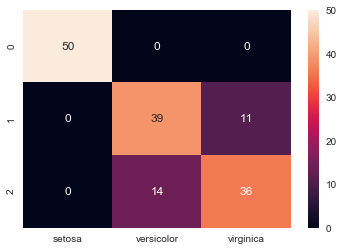

In [167]:
conf_pred_df = pd.DataFrame(conf_pred, columns = ["setosa",'versicolor',"virginica"])
sns.heatmap(conf_pred_df, annot=True)

We try to find the best confusion matrix by  changing the random state in the function KMeans(), and assigning the right number (0,1,2) to the corresponding , by analysis the PCA visualization and the prediction array

### Question 8 -  Choose a solution that seems good enough for you and compute the silhouette index (command silhouette_score() of sklearn.metrics). Comment.

In [168]:

score = silhouette_score(principalDf, prediction, metric='euclidean')
score

0.5081546339516393

We would have an higher silhouette score we computed the KMeans with  a number of cluster equals to 2 :  as said before two  classes are really similare , as seen on the PCA visualization, and could be consider as 1 cluster only. It would result in a higher silhouette score.

### Question 9 - Start again questions 4) to 8) using the original data (with 4 variables) instead of the projected ones. 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
-78.94084142614565


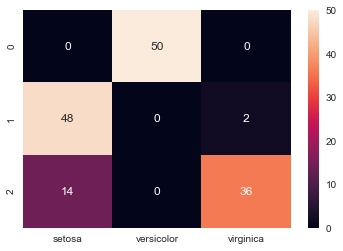

0.5525919445499757


In [155]:
kmeans = KMeans(n_clusters = 3, n_init = 5, max_iter=300, random_state= 1).fit(iris_df)
kmeans.score(iris_df)
prediction = kmeans.predict(iris_df)
print(prediction)
print(kmeans.score(iris_df))
prediction_str=np.empty((len(prediction))).astype(str)
prediction_str[prediction== 0]='setosa'
prediction_str[prediction== 1]='versicolor'
prediction_str[prediction== 2]='virginica'
#conf_pred = confusion_matrix(np.array(iris_class.values, dtype=int),np.array(prediction, dtype=int))
conf_pred = confusion_matrix(np.array(iris_class.values, dtype=str),np.array(prediction_str))
np.unique(np.array(iris_class.values, dtype=str))
conf_pred_df = pd.DataFrame(conf_pred, columns = ["setosa",'versicolor',"virginica"])
sns.heatmap(conf_pred_df, annot=True)
plt.show()
score = silhouette_score(iris_df, prediction, metric='euclidean')
print(score)

We have a silhouette score closer to one ( by approximatively  0.05) that we can explain by the use of more variables to categorize the data instead of the two  principals components, meaning our model would be more precise. 
But we have to be careful  if we use the original ones instead of the projected datas as sometimes some caracteristics doesn't have an importance in the classification of the data, and the model would be impacted as such in resulting in a lower silhouette score 